In [71]:
#import library
import kagglehub
import os
import pathlib
import random
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

In [72]:
path = kagglehub.dataset_download("kritikseth/fruit-and-vegetable-image-recognition")

In [73]:
print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/fruit-and-vegetable-image-recognition


# Sorting the Fruits into another folder

In [74]:
train_path=path+"/train"
test_path=path+"/test"
validation_path=path+'/validation'

In [75]:
fruit=["Banana", "Apple", "Pear", "Grapes", "Orange",
    "Kiwi", "Watermelon", "Pomegranate", "Pineapple", "Mango"]

In [76]:
fruit_names=[fruit.lower() for fruit in fruit]

In [77]:
fruit_names

['banana',
 'apple',
 'pear',
 'grapes',
 'orange',
 'kiwi',
 'watermelon',
 'pomegranate',
 'pineapple',
 'mango']

## Finding the number of classes

In [78]:
number_of_classes=len(os.listdir(path+"/train"))
number_of_classes

36

## Finding the class names

In [79]:
data_dir=pathlib.Path(path+"/train")

In [80]:
class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))

In [81]:
class_names

array(['apple', 'banana', 'beetroot', 'bell pepper', 'cabbage',
       'capsicum', 'carrot', 'cauliflower', 'chilli pepper', 'corn',
       'cucumber', 'eggplant', 'garlic', 'ginger', 'grapes', 'jalepeno',
       'kiwi', 'lemon', 'lettuce', 'mango', 'onion', 'orange', 'paprika',
       'pear', 'peas', 'pineapple', 'pomegranate', 'potato', 'raddish',
       'soy beans', 'spinach', 'sweetcorn', 'sweetpotato', 'tomato',
       'turnip', 'watermelon'], dtype='<U13')

## Viewing a random image

In [82]:
def view_random_image(target_dir,target_class=random.choice(class_names)):
  target_folder=target_dir+"/"+target_class
  random_image=random.sample(os.listdir(target_folder),1)
  img=cv2.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")
  print(f"Image shape {img.shape}")

In [83]:
train_path

'/kaggle/input/fruit-and-vegetable-image-recognition/train'

Image shape (682, 1200, 3)


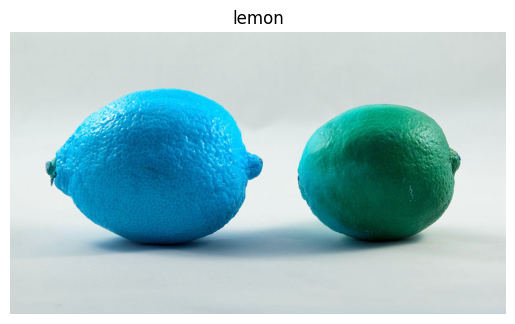

In [84]:
view_random_image(target_dir=train_path,target_class=random.choice(class_names))

## Loading the images

In [85]:
img_width, img_height = 300, 300

In [86]:
train_datagen=ImageDataGenerator(rescale=1./255)
valid_datagen=ImageDataGenerator(rescale=1./255)

In [87]:
train_dir=train_path

In [88]:
test_dir=test_path

In [89]:
train_data=train_datagen.flow_from_directory(train_dir,
                                             batch_size=32,
                                             class_mode="categorical",
                                             seed=13,
                                             target_size=(img_width, img_height))

Found 3115 images belonging to 36 classes.


In [90]:
test_data=valid_datagen.flow_from_directory(test_dir,
                                            batch_size=32,
                                            class_mode='categorical',
                                            target_size=(img_width, img_height),
                                            seed=13)

Found 359 images belonging to 36 classes.


In [91]:
num_class=train_data.num_classes

In [92]:
num_class

36

In [93]:
model1=models.Sequential()

# First Hidden Layers
model1.add(layers.Conv2D(64, (3, 3),activation='relu',input_shape=(img_height,img_width,3)))
model1.add(layers.MaxPooling2D((4, 4)))

#Second hidden layers
model1.add(layers.Conv2D(128,(3, 3),activation='relu'))
model1.add(layers.MaxPooling2D((4, 4)))

#Third Hidden Layers
model1.add(layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model1.add(layers.MaxPooling2D((4,4)))

# Flatten and add dense layers

model1.add(layers.Flatten())
model1.add(layers.Dense(64,activation='relu'))
model1.add(Dropout(0.01))
model1.add(layers.Dense(num_class,activation='softmax'))

In [94]:
model1.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 298, 298, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 72, 72, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 18, 18, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 18, 18, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,380 (849.14 KB)

 Trainable params: 217,380 (849.14 KB)

 Non-trainable params: 0 (0.00 B)

In [98]:
from tensorflow.keras.optimizers import Adam

In [99]:
optim=Adam(learning_rate=0.0013)

In [100]:
model1.compile(
    optimizer=optim,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [101]:
histroy=model1.fit(
    train_data,
    epochs=10,
    validation_data=test_data
)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.0574 - loss: 3.5010

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


98/98 ━━━━━━━━━━━━━━━━━━━━ 595s 6s/step - accuracy: 0.0577 - loss: 3.4993 - val_accuracy: 0.2368 - val_loss: 2.7833
Epoch 2/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 629s 6s/step - accuracy: 0.2062 - loss: 2.7225 - val_accuracy: 0.3120 - val_loss: 2.1642
Epoch 3/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 594s 6s/step - accuracy: 0.2874 - loss: 2.3818 - val_accuracy: 0.3983 - val_loss: 1.9133
Epoch 4/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 585s 6s/step - accuracy: 0.3442 - loss: 2.1620 - val_accuracy: 0.5404 - val_loss: 1.5962
Epoch 5/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 587s 6s/step - accuracy: 0.3869 - loss: 2.0136 - val_accuracy: 0.5153 - val_loss: 1.5385
Epoch 6/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 571s 6s/step - accuracy: 0.4159 - loss: 1.8977 - val_accuracy: 0.5655 - val_loss: 1.3791
Epoch 7/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 583s 6s/step - accuracy: 0.4604 - loss: 1.7600 - val_accuracy: 0.6407 - val_loss: 1.2196
Epoch 8/10
98/98 ━━━━━━━━━━━━━━━━━━━━ 584s 6s/step - accuracy: 0.4773 - loss: 1.6807 - val_accuracy: 0.6741 - val_loss: 1.

In [102]:
test_loss, test_acc = model1.evaluate(test_data, verbose=2)
print(f'Test accuracy: {test_acc}')

12/12 - 46s - 4s/step - accuracy: 0.6992 - loss: 0.9824
Test accuracy: 0.6991643309593201


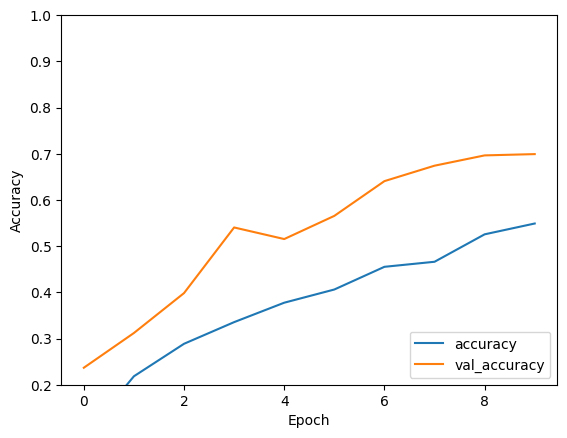

In [104]:
plt.plot(histroy.history['accuracy'], label='accuracy')
plt.plot(histroy.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 1])
plt.legend(loc='lower right')
plt.show()

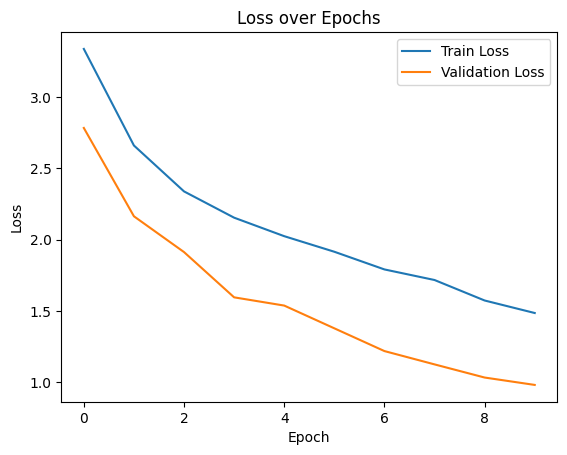

In [105]:

plt.plot(histroy.history['loss'], label='Train Loss')
plt.plot(histroy.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')

plt.show()